#### Problem Statement: Job Categorization and Prediction Model

Background:
In the context of workforce management, organizations often face the challenge of categorizing employees into distinct paygrades based on various measured features. These features include, but are not limited to, contact level, financial responsibility, and supervision received. The objective is to establish a mathematical model that optimally assigns individuals to specific paygrades by analyzing their feature levels.

Objective:
Design a model that utilizes the measured features of individuals within a population to accurately categorize them into known groups (paygrades). Additionally, the model should be capable of predicting the most suitable paygrade for individuals not yet in the population, based on their feature levels.

Key Components:

Known Groups (Paygrades): The population is divided into predefined groups, each representing a specific paygrade. These paygrades serve as the basis for categorization.
Measured Features: Each member of the population is characterized by a set of measured features, such as contact level, financial responsibility, supervision received, etc. These features are crucial in determining the appropriate paygrade for an individual.
Mathematical Model: Develop a mathematical model that identifies the combination of feature levels associated with each paygrade. The model should optimize the assignment of individuals to paygrades based on these features.
Prediction Formulae: Derive formulas from the mathematical model that can be used to predict the most fitting paygrade for individuals not yet included in the population. These formulas will allow for a quantitative assessment of the suitability of an individual for a particular paygrade.

Challenges:

Variable Importance: Determine the relative importance of each measured feature in predicting the appropriate paygrade.
Model Robustness: Ensure the model's robustness and adaptability to changes in the workforce or modifications to the features considered.
Data Quality: Address issues related to data quality, ensuring that the measured features accurately represent the characteristics of individuals.
Scalability: Design the model to be scalable, allowing for efficient categorization and prediction as the size of the workforce grows.

Expected Outcome:

The ultimate goal is to have a reliable and efficient model that, given the measured features of an individual, can accurately categorize them into the appropriate paygrade. The model's predictive capabilities should facilitate workforce planning and decision-making, enabling organizations to effectively manage human resources based on a quantitative assessment of individual capabilities and responsibilities.

In [2]:
# Import libraries

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Get the data
data = pd.read_csv('job_class_info.csv')

In [4]:
# Check data structure
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    66 non-null     int64 
 1   JobFamily             66 non-null     int64 
 2   JobFamilyDescription  66 non-null     object
 3   JobClass              66 non-null     int64 
 4   JobClassDescription   66 non-null     object
 5   PayGrade              66 non-null     int64 
 6   EducationLevel        66 non-null     int64 
 7   Experience            66 non-null     int64 
 8   OrgImpact             66 non-null     int64 
 9   ProblemSolving        66 non-null     int64 
 10  Supervision           66 non-null     int64 
 11  ContactLevel          66 non-null     int64 
 12  FinancialBudget       66 non-null     int64 
 13  PG                    66 non-null     object
dtypes: int64(11), object(3)
memory usage: 7.3+ KB
None


In [5]:
# Check data summary
print(data.describe())

              ID  JobFamily   JobClass   PayGrade  EducationLevel  Experience  \
count  66.000000  66.000000  66.000000  66.000000       66.000000   66.000000   
mean   33.500000   7.606061  33.500000   5.696970        3.166667    1.757576   
std    19.196354   4.209436  19.196354   2.517445        1.525005    2.134411   
min     1.000000   1.000000   1.000000   1.000000        1.000000    0.000000   
25%    17.250000   4.000000  17.250000   4.000000        2.000000    0.000000   
50%    33.500000   7.000000  33.500000   5.000000        4.000000    1.000000   
75%    49.750000  11.000000  49.750000   8.000000        4.000000    2.750000   
max    66.000000  15.000000  66.000000  10.000000        6.000000   10.000000   

       OrgImpact  ProblemSolving  Supervision  ContactLevel  FinancialBudget  
count  66.000000       66.000000    66.000000     66.000000        66.000000  
mean    3.348485        3.606061     3.863636      4.757576         5.303030  
std     1.767157        1.412894 

### Data Visualization

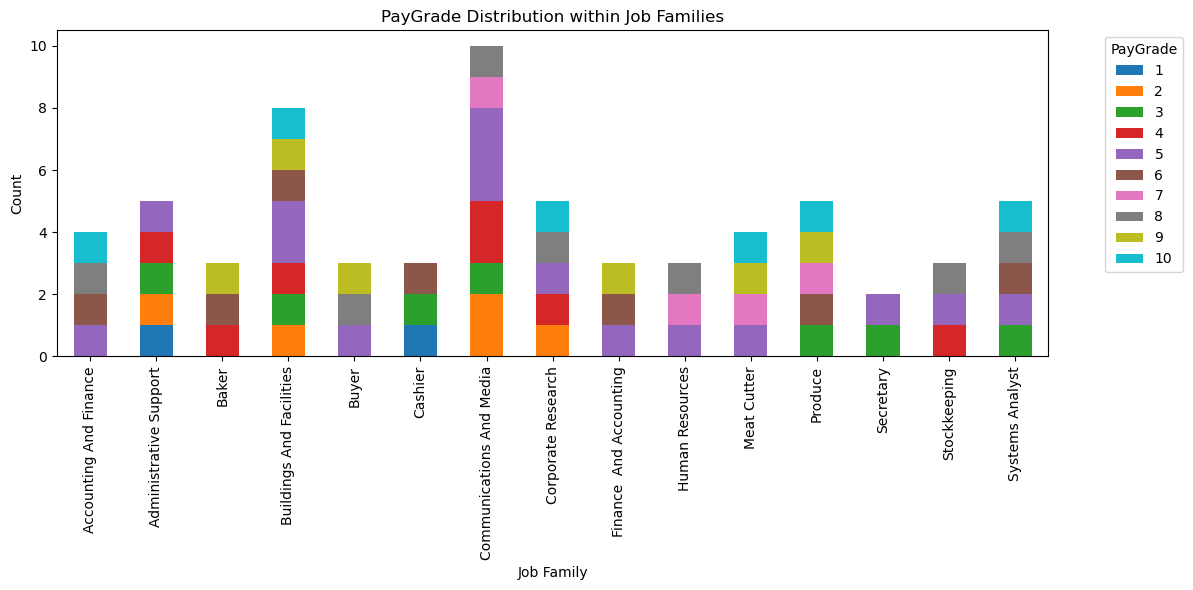

In [6]:
# Group the data by 'JobFamily' and 'PayGrade' and count the occurrences

family_paygrade_counts = data.groupby(['JobFamilyDescription', 'PayGrade']).size().unstack(fill_value=0)

family_paygrade_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('PayGrade Distribution within Job Families')
plt.xlabel('Job Family')
plt.ylabel('Count')
plt.legend(title='PayGrade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

#### The above graph gives a summary of job class counts across salary ranges in different job families. 

In [7]:
# Check the correlation
numeric_col = data.select_dtypes(include=['number'])
numeric_col.corr()

,ID,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget
ID,1.000000,0.991741,0.930112,0.189101,0.280895,0.313152,0.211112,0.155421,0.145690,0.122392,0.043645
JobFamily,0.991741,1.000000,0.921678,0.162776,0.254836,0.276877,0.180057,0.126123,0.117167,0.104666,0.017497
JobClass,0.930112,0.921678,1.000000,0.123521,0.181045,0.280110,0.154876,0.112879,0.104935,0.084408,-0.024550
PayGrade,0.189101,0.162776,0.123521,1.000000,0.806809,0.573070,0.888656,0.947767,0.851785,0.842057,0.899730
EducationLevel,0.280895,0.254836,0.181045,0.806809,1.000000,0.513610,0.720253,0.752093,0.716784,0.685180,0.708680
Experience,0.313152,0.276877,0.280110,0.573070,0.513610,1.000000,0.638643,0.544316,0.540627,0.435402,0.545558
OrgImpact,0.211112,0.180057,0.154876,0.888656,0.720253,0.638643,1.000000,0.875337,0.865312,0.806091,0.839646
ProblemSolving,0.155421,0.126123,0.112879,0.947767,0.752093,0.544316,0.875337,1.000000,0.876924,0.836720,0.842780
Supervision,0.145690,0.117167,0.104935,0.851785,0.716784,0.540627,0.865312,0.876924,1.000000,0.778425,0.802030
ContactLevel,0.122392,0.104666,0.084408,0.842057,0.685180,0.435402,0.806091,0.836720,0.778425,1.000000,0.796943


<AxesSubplot:>

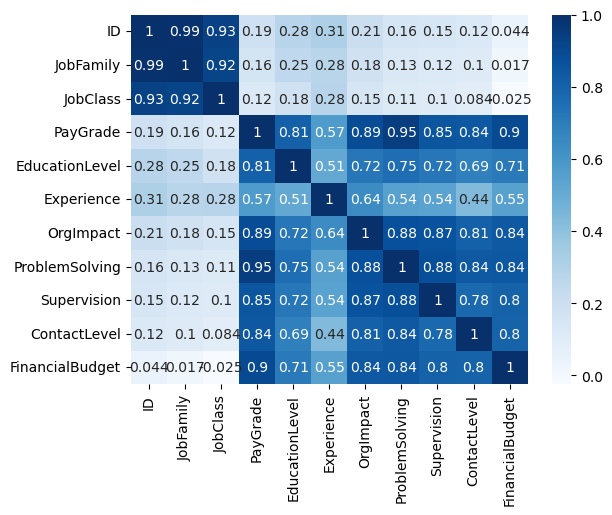

In [8]:
# Draw the headmap
sns.heatmap(numeric_col.corr(), annot=True, cmap='Blues')

#### Experience is least correlated to pay grade and problem solving is highly correlated.

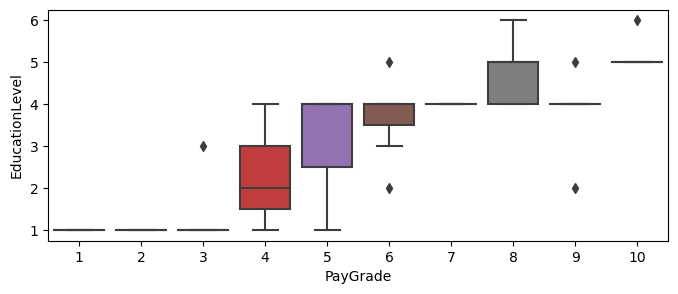

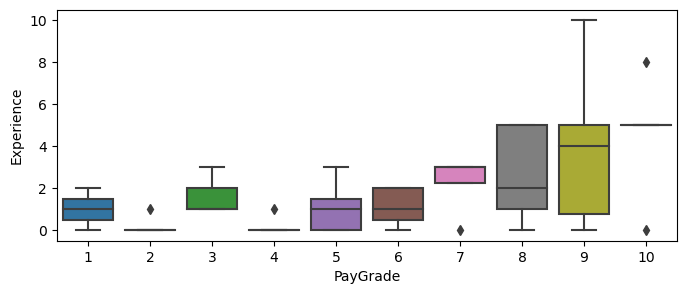

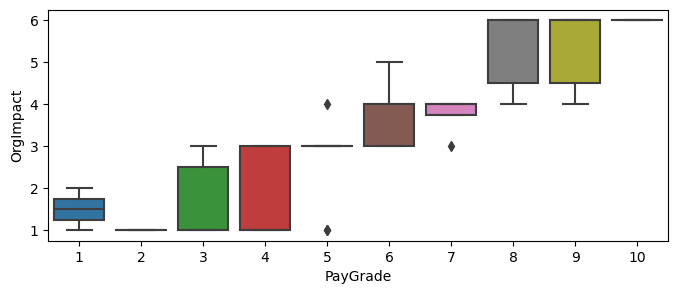

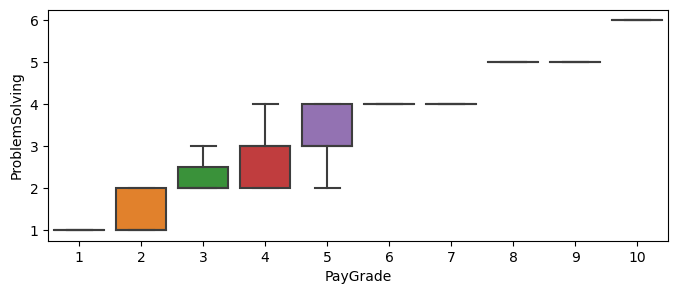

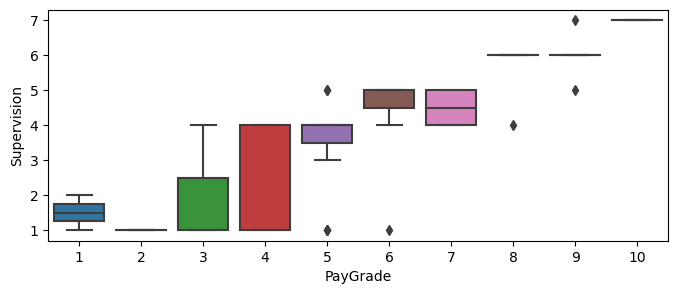

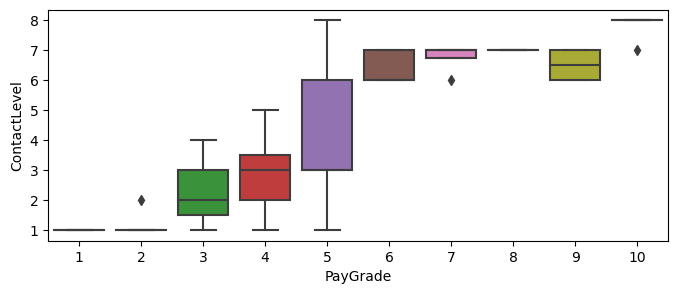

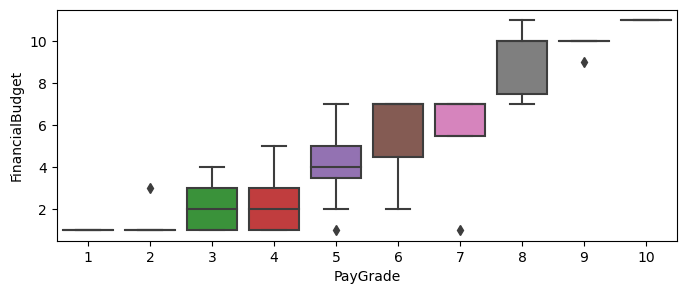

In [9]:
# Check the data distribution between dependent and independent variables.

features = ['EducationLevel','Experience','OrgImpact','ProblemSolving','Supervision','ContactLevel','FinancialBudget']
for i in features:
    plt.figure(figsize=(8,3))
    sns.boxplot(data['PayGrade'],data[i])
    plt.show()

#### The above graph shows the spred of each feature across PayGrades. Problem solving does not have outliers. 

### Model building

##### Linear Discriminant Analysis model

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the independent variables (X) and target variable (y)
X = data[['EducationLevel', 'Experience', 'OrgImpact', 'ProblemSolving', 'Supervision', 'ContactLevel', 'FinancialBudget']]
y = data['PayGrade']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the LDA model
ldaModel = LinearDiscriminantAnalysis(tol=0.0001)
ldaModel.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
# Coefficients of linear discriminants
coefficients = ldaModel.scalings_

# Define the feature names (column labels)
feature_names = ["EducationLevel", "Experience", "OrgImpact", "ProblemSolving", "Supervision", "ContactLevel", "FinancialBudget"]

# Display the coefficients table
coefficients_df = pd.DataFrame(coefficients, columns=feature_names)
coefficients_df.index.name = "Discriminant"
print(coefficients_df)

              EducationLevel  Experience  OrgImpact  ProblemSolving  \
Discriminant                                                          
0                   0.649502    0.748572   0.363698        0.622669   
1                  -0.088596   -0.262281  -0.153505       -0.131964   
2                   0.238860    0.034087   0.464127       -0.025699   
3                   3.158503   -0.115605  -2.029641        0.440377   
4                  -0.498287   -0.123469   0.455286        0.140264   
5                  -0.144114    0.590904   0.069912       -0.668072   
6                   0.440839   -0.462688   0.270440       -0.012524   

              Supervision  ContactLevel  FinancialBudget  
Discriminant                                              
0               -0.118412      0.289546        -0.242364  
1               -0.237051      0.392441        -0.045800  
2                1.186838      0.311996         0.114621  
3                0.212474     -0.520999        -0.229926  
4     

In [12]:
# Display the class means table
class_means = ldaModel.means_

row_labels = [f"Class {i+1}" for i in range(len(class_means))]
column_labels = ["EducationLevel", "Experience", "OrgImpact", "ProblemSolving", "Supervision", "ContactLevel", "FinancialBudget"]

class_means_df = pd.DataFrame(class_means, columns=column_labels, index=row_labels)
print(class_means_df)

          EducationLevel  Experience  OrgImpact  ProblemSolving  Supervision  \
Class 1         1.000000    1.000000   1.500000        1.000000     1.500000   
Class 2         1.000000    0.000000   1.000000        1.000000     1.000000   
Class 3         1.333333    1.666667   1.833333        2.333333     2.000000   
Class 4         2.333333    0.166667   2.000000        2.500000     2.500000   
Class 5         3.272727    1.000000   2.727273        3.181818     3.363636   
Class 6         3.600000    1.200000   3.800000        4.000000     4.000000   
Class 7         4.000000    2.000000   3.666667        4.000000     4.666667   
Class 8         4.714286    2.714286   5.285714        5.000000     5.714286   
Class 9         3.800000    3.600000   5.200000        5.000000     6.000000   
Class 10        5.200000    4.600000   6.000000        6.000000     7.000000   

          ContactLevel  FinancialBudget  
Class 1       1.000000         1.000000  
Class 2       1.000000         1.00

###### We can use this information to understand how each feature's mean value varies across different classes. It provides insights into the differences in feature values between classes and can help us identify which features contribute most to the separation of classes in the LDA model.
We can can use t-tests or analysis of variance (ANOVA) to determine if there are significant differences in the mean values of features (independent variables) between different groups or classes (PayGrades). These statistical tests help to identify which features are strong discriminators among the classes.

In [13]:
from scipy.stats import ttest_ind

class_labels = data['PayGrade'].unique()  # Get unique class labels
significant_features = []

for feature in ["EducationLevel", "Experience", "OrgImpact", "ProblemSolving", "Supervision", "ContactLevel", "FinancialBudget"]:  # Replace with your feature names
    for i in range(len(class_labels)):
        for j in range(i + 1, len(class_labels)):
            class1_data = data[data['PayGrade'] == class_labels[i]][feature]
            class2_data = data[data['PayGrade'] == class_labels[j]][feature]

            # Perform t-test
            t_stat, p_value = ttest_ind(class1_data, class2_data)

            if p_value < 0.05:  # Define significance level
                print(f"Significant difference found for {feature} between {class_labels[i]} and {class_labels[j]}")
                significant_features.append(feature)


Significant difference found for EducationLevel between 5 and 8
Significant difference found for EducationLevel between 5 and 10
Significant difference found for EducationLevel between 5 and 1
Significant difference found for EducationLevel between 5 and 2
Significant difference found for EducationLevel between 5 and 3
Significant difference found for EducationLevel between 6 and 10
Significant difference found for EducationLevel between 6 and 1
Significant difference found for EducationLevel between 6 and 2
Significant difference found for EducationLevel between 6 and 3
Significant difference found for EducationLevel between 6 and 4
Significant difference found for EducationLevel between 8 and 1
Significant difference found for EducationLevel between 8 and 2
Significant difference found for EducationLevel between 8 and 3
Significant difference found for EducationLevel between 8 and 4
Significant difference found for EducationLevel between 10 and 1
Significant difference found for Educ

Significant difference found for Supervision between 2 and 9
Significant difference found for Supervision between 2 and 7
Significant difference found for Supervision between 3 and 9
Significant difference found for Supervision between 3 and 7
Significant difference found for Supervision between 4 and 9
Significant difference found for Supervision between 4 and 7
Significant difference found for Supervision between 9 and 7
Significant difference found for ContactLevel between 5 and 6
Significant difference found for ContactLevel between 5 and 8
Significant difference found for ContactLevel between 5 and 10
Significant difference found for ContactLevel between 5 and 2
Significant difference found for ContactLevel between 5 and 3
Significant difference found for ContactLevel between 5 and 9
Significant difference found for ContactLevel between 5 and 7
Significant difference found for ContactLevel between 6 and 8
Significant difference found for ContactLevel between 6 and 10
Significant d

In [14]:
# ANOVA (for comparing means among multiple groups/classes):

from scipy.stats import f_oneway

for feature in ["EducationLevel", "Experience", "OrgImpact", "ProblemSolving", "Supervision", "ContactLevel", "FinancialBudget"]:
    class_data = []
    for label in class_labels:
        class_data.append(data[data['PayGrade'] == label][feature])

    f_stat, p_value = f_oneway(*class_data)

    if p_value < 0.05:  # Define significance level
        print(f"Significant difference found for {feature} among PayGrades")
        significant_features.append(feature)

Significant difference found for EducationLevel among PayGrades
Significant difference found for Experience among PayGrades
Significant difference found for OrgImpact among PayGrades
Significant difference found for ProblemSolving among PayGrades
Significant difference found for Supervision among PayGrades
Significant difference found for ContactLevel among PayGrades
Significant difference found for FinancialBudget among PayGrades


##### It appears that all the features (EducationLevel, Experience, OrgImpact, ProblemSolving, Supervision, ContactLevel, and FinancialBudget) have statistically significant differences among the different PayGrades. This means that each of these features contributes significantly to the separation of PayGrades in the dataset.

In [15]:
# Explained variance ratio for all Linear Discriminants
explained_variance_ratio = ldaModel.explained_variance_ratio_
explained_variance_ratio

array([9.66365654e-01, 2.27693286e-02, 5.96616801e-03, 2.41177151e-03,
       1.75696936e-03, 5.70731639e-04, 1.59376956e-04])

##### In LDA, the linear discriminants are the dimensions used to project the data in a way that maximizes class separability. These ratios tell the proportion of the total variance in the data that is explained by each linear discriminant. 
First Linear Discriminant: 96.64%

#### Prediction using LDA

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = ldaModel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [17]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[1 2 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 2 2 0 0 0]
 [0 0 0 0 1 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.33      0.50         3
           3       0.33      1.00      0.50         1
           4       0.00      0.00      0.00         1
           5       0.67      0.50      0.57         4
           6       0.25      0.50      0.33         2
           7       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1

    accuracy                           0.50        14
   macro avg       0.53      0.54      0.49        14
weighted avg       0.61      0.50      0.50        14



In [18]:
# Create new data for prediction
new_data = pd.DataFrame({'EducationLevel': [3], 'Experience': [4], 'OrgImpact': [2],
                          'ProblemSolving': [4], 'Supervision': [3], 'ContactLevel': [5],
                          'FinancialBudget': [3]})

# Make predictions
predicted_paygrade = ldaModel.predict(new_data)
print("Predicted PayGrade:", predicted_paygrade[0])

Predicted PayGrade: 5


### Logistics Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the logistic regression model for multiclass classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict pay grades on the test set
y_pred = model.predict(X_test)

In [20]:
# Generate a classification report for multiclass classification
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.67      0.80         3
           3       0.67      1.00      0.80         2
           4       1.00      0.50      0.67         2
           5       0.60      0.60      0.60         5
           6       0.33      0.33      0.33         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2

    accuracy                           0.60        20
   macro avg       0.59      0.57      0.56        20
weighted avg       0.63      0.60      0.60        20

Confusion Matrix:
[[2 1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0]
 [0 0 0 3 1 1 0 0 0]
 [0 0 0 1 1 1 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 2]]


In [21]:
# Predict pay grades for new data
new_data = pd.DataFrame({'EducationLevel': [3], 'Experience': [4], 'OrgImpact': [2],
                          'ProblemSolving': [4], 'Supervision': [3], 'ContactLevel': [5],
                          'FinancialBudget': [3]})
predicted_pay_grade = model.predict(new_data)
print(predicted_pay_grade)

[3]


## Decision tree - Bagging

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier()

# Create a bagging ensemble
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42) # n_estimators=10

# Train the ensemble on your data
bagging_classifier.fit(X_train, y_train)

# Make predictions
predictions = bagging_classifier.predict(X_test)

In [25]:
# Generate a classification report for multiclass classification
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion)

Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.33      0.50         3
           3       0.33      1.00      0.50         2
           4       1.00      0.50      0.67         2
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2

    accuracy                           0.75        20
   macro avg       0.87      0.83      0.79        20
weighted avg       0.91      0.75      0.76        20

Confusion Matrix:
[[1 2 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0]
 [0 1 0 3 0 1 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 2]]


In [26]:
# Predict pay grades for new data
new_data = pd.DataFrame({'EducationLevel': [3], 'Experience': [4], 'OrgImpact': [2],
                          'ProblemSolving': [4], 'Supervision': [3], 'ContactLevel': [5],
                          'FinancialBudget': [3]})
predicted_pay_grade = bagging_classifier.predict(new_data)
print(predicted_pay_grade)

[5]


### Decision tree - AdaBoostClassifier

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a base classifier (e.g., decision tree)
base_classifier = DecisionTreeClassifier(max_depth=2)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=20, random_state=42)

# Train the ensemble on your data
adaboost_classifier.fit(X_train, y_train)

# Make predictions
predictions = adaboost_classifier.predict(X_test)

In [28]:
# Generate a classification report for multiclass classification
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion)

Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.33      0.50         3
           3       0.33      1.00      0.50         2
           4       0.00      0.00      0.00         2
           5       0.75      0.60      0.67         5
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2

    accuracy                           0.65        20
   macro avg       0.61      0.66      0.59        20
weighted avg       0.65      0.65      0.60        20

Confusion Matrix:
[[1 2 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0]
 [0 1 0 3 1 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 2]]


In [29]:
# Predict pay grades for new data
new_data = pd.DataFrame({'EducationLevel': [3], 'Experience': [4], 'OrgImpact': [2],
                          'ProblemSolving': [4], 'Supervision': [3], 'ContactLevel': [5],
                          'FinancialBudget': [3]})
predicted_pay_grade = adaboost_classifier.predict(new_data)
print(predicted_pay_grade)

[5]


### Feature engineering

In [30]:
# Outliers are replaced with median.

outlier_features = ['EducationLevel','Experience','OrgImpact','Supervision','ContactLevel','FinancialBudget']

for feature in outlier_features:
    for paygrade in data['PayGrade'].unique():
        subdata = data[data['PayGrade']==paygrade][feature]
        q1 = np.percentile(subdata,25)
        q3 = np.percentile(subdata,75)
        iqr = q3-q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
         # Replace outliers with the median value
        data.loc[data['PayGrade']==paygrade, feature] = np.where((subdata < lower_bound) | (subdata > upper_bound), np.median(subdata), data.loc[data['PayGrade']==paygrade,feature])

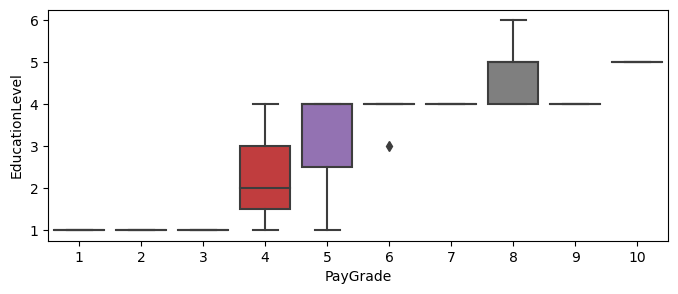

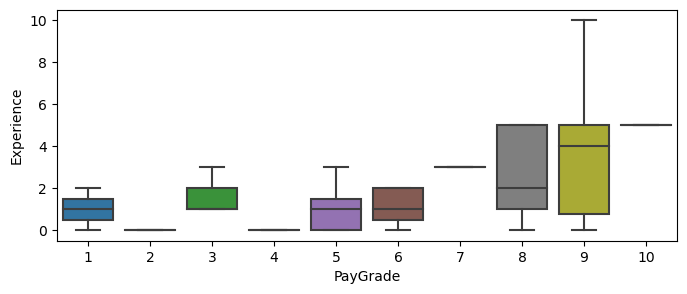

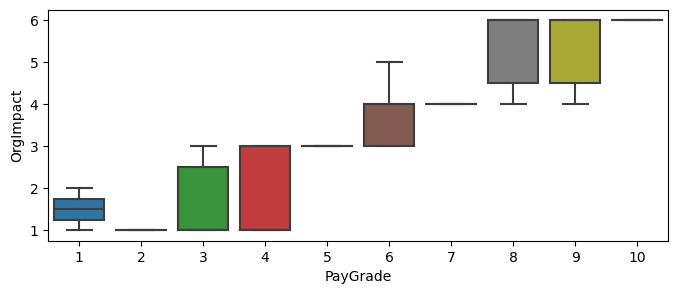

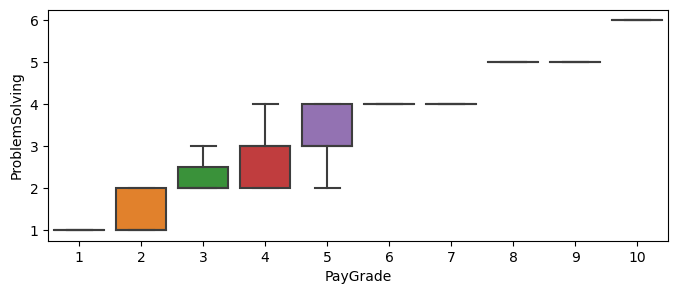

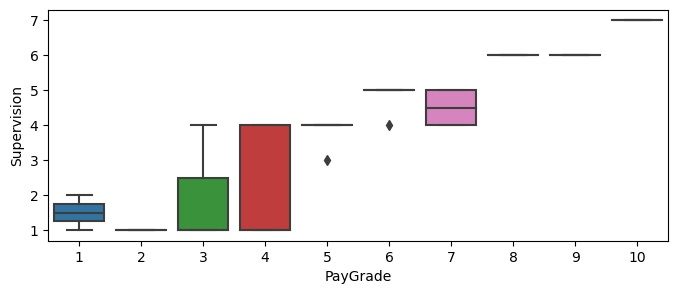

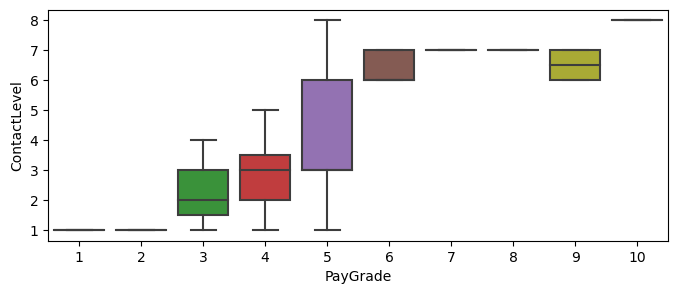

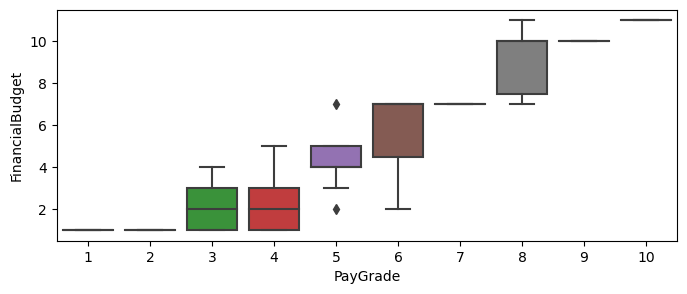

In [31]:
features = ['EducationLevel','Experience','OrgImpact','ProblemSolving','Supervision','ContactLevel','FinancialBudget']
for i in features:
    plt.figure(figsize=(8,3))
    sns.boxplot(data['PayGrade'],data[i])
    plt.show()

In [32]:
# Define the independent variables (X) and target variable (y)
X = data[['EducationLevel', 'Experience', 'OrgImpact', 'ProblemSolving', 'Supervision', 'ContactLevel', 'FinancialBudget']]
y = data['PayGrade']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### LDA Model

In [33]:
# Create and fit the LDA model
ldaModel = LinearDiscriminantAnalysis(tol=0.0001)
ldaModel.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = ldaModel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7142857142857143


In [35]:
# Generate a classification report for multiclass classification
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.33      0.50         3
           3       0.33      1.00      0.50         1
           4       0.50      1.00      0.67         1
           5       1.00      0.50      0.67         4
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1

    accuracy                           0.71        14
   macro avg       0.81      0.85      0.77        14
weighted avg       0.87      0.71      0.71        14

Confusion Matrix:
[[1 2 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 1 2 1 0 0 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


In [36]:
# Predict pay grades for new data
new_data = pd.DataFrame({'EducationLevel': [3], 'Experience': [4], 'OrgImpact': [2],
                          'ProblemSolving': [4], 'Supervision': [3], 'ContactLevel': [5],
                          'FinancialBudget': [3]})
predicted_pay_grade = bagging_classifier.predict(new_data)
print(predicted_pay_grade)

[5]


#### DecisionTreeClassifier - Bagging

In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier()

# Create a bagging ensemble
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42) # n_estimators=10

# Train the ensemble on your data
bagging_classifier.fit(X_train, y_train)

# Make predictions
predictions = bagging_classifier.predict(X_test)

In [38]:
# Generate a classification report for multiclass classification
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion)

Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         1
           4       0.25      1.00      0.40         1
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1

    accuracy                           0.79        14
   macro avg       0.91      0.89      0.84        14
weighted avg       0.95      0.79      0.81        14

Confusion Matrix:
[[1 0 2 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 1 3 0 0 0 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


In [39]:
# Predict pay grades for new data
new_data = pd.DataFrame({'EducationLevel': [3], 'Experience': [4], 'OrgImpact': [2],
                          'ProblemSolving': [4], 'Supervision': [3], 'ContactLevel': [5],
                          'FinancialBudget': [3]})
predicted_pay_grade = bagging_classifier.predict(new_data)
print(predicted_pay_grade)

[5]


### Decision tree - AdaBoostClassifier

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a base classifier (e.g., decision tree)
base_classifier = DecisionTreeClassifier(max_depth=2)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=20, random_state=42)

# Train the ensemble on your data
adaboost_classifier.fit(X_train, y_train)

# Make predictions
predictions = adaboost_classifier.predict(X_test)

In [41]:
# Generate a classification report for multiclass classification
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion)

Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.33      0.50         3
           3       0.33      1.00      0.50         1
           4       0.00      0.00      0.00         1
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1

    accuracy                           0.79        14
   macro avg       0.77      0.79      0.74        14
weighted avg       0.82      0.79      0.75        14

Confusion Matrix:
[[1 2 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


In [42]:
# Predict pay grades for new data
new_data = pd.DataFrame({'EducationLevel': [3], 'Experience': [4], 'OrgImpact': [2],
                          'ProblemSolving': [4], 'Supervision': [3], 'ContactLevel': [5],
                          'FinancialBudget': [3]})
predicted_pay_grade = adaboost_classifier.predict(new_data)
print(predicted_pay_grade)

[5]


#### Random forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=42)

# Train the Random Forest model on your data
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

In [70]:
# Generate a classification report for multiclass classification
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion)

Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.33      0.50         3
           3       0.33      1.00      0.50         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1

    accuracy                           0.86        14
   macro avg       0.92      0.92      0.88        14
weighted avg       0.95      0.86      0.86        14

Confusion Matrix:
[[1 2 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


EducationLevel: 0.14406766501312235
Experience: 0.15408437825465388
OrgImpact: 0.09265723762523002
ProblemSolving: 0.19497643456918234
Supervision: 0.13650806309213165
ContactLevel: 0.13675308142570466
FinancialBudget: 0.14095314001997514


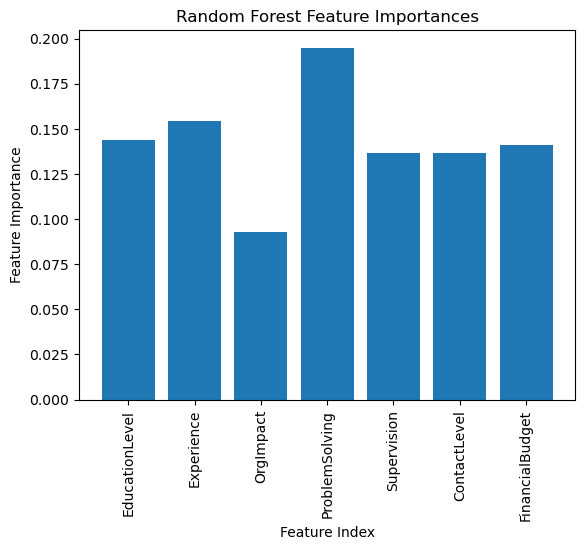

In [71]:
# Print feature importances with corresponding feature names
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance}")

# Plot feature importances
plt.bar(range(len(feature_names)), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.xticks(range(len(feature_names)), feature_names, rotation='vertical')
plt.show()

#### Conclusion : Random forest have given the highest accuracy so far. The feature importance graph indicates 'Problem solving' is the most important feature.